<a href="https://colab.research.google.com/github/ismael-rtellez/Linear_Regression_Sprint/blob/main/Linear_Regression_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

class ScratchLinearRegression:
    """
    Scratch implementation of linear Regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if not bias term is included
    verbose : bool
      True the output the learning process

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record on validation data
    """

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperperameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered,
        the loss and accuracy for it are also calculated for each iterations.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : ndarray, shape (n_samples, )
            Correct value of verification data
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]

        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])

        # Prepare theta for hypothesis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))

        for i in range(self.iter):
            y_hypothetical = self._linear_hypothesis(X)
            self.theta = self._gradient_descent(X, y, y_hypothetical)
            self.loss[i] = self._loss_function(y_hypothetical, y)

            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)

        if self.verbose:
            # Output learning process when verbose is set to True
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))
        pass

    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Sample
        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        # Problem 3:
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples,1]), X])
        return np.dot(X, self.theta.T)

    # Problem 1:
    def _linear_hypothesis(self, X):
        """
        Calcular funciones lineales hipotéticas.

        Parameters
        ----------
        X : de la siguiente forma.ndarray, shape (n_samples, n_features)
            datos de entrenamiento

        Returns
        -------
          de la siguiente forma.ndarray, shape (n_samples, 1)
        Resultados de la estimación con funciones lineales hipotéticas.

        """
        y_hypothetical = np.dot(X, self.theta.T)
        return y_hypothetical

    # Problem 2:
    def _gradient_descent(self, X, y, y_hypothetical):
        """
        Update new theta j in the steepest descent method
        Parameters
        -----------
        X: ndarray, shape (n_samples, n_features)
              training data
        y: ndarray, shape (n_samples,)
              Correct answer value of training data
        y_hypothetical: ndarray, shape (n_samples, 1)
        Returns
        -----------
        new_theta: ndarray, shape (n_features, 1)
              New theta value
        """
        n_samples = X.shape[0]
        new_theta = self.theta - (self.lr * np.dot((y_hypothetical - y), X) / n_samples)
        return new_theta

    # Problem 5:
    def _loss_function(self, y_pred, y):
        """
        Calculation of objective function
        Parameters
        ----------
        pred_y: The followings forms ofndarray, shape (n_samples,)
            Estimated value
        y: The following forms of ndarray, shape (n_samples)
            Correct answer values
        Returns
        ---------
        loss: numpy.float
            Result of the loss function
        """
        loss = np.mean((y_pred - y)** 2)/ 2
        return loss

# problem 4:
def MSE(y_pred, y):
    """
    Calculation if mean square error
    Parameters
    -----------
    y_pred: The following forms of ndarray, shape (n_samples,)
      Estimated value
    y: The following forms of ndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse: numpy.float
      Mean Square Error
    """
    n_samples = y.shape[0]
    mse = np.mean((y_pred - y)** 2)
    return mse


### [Problem 1] Hypothetical Function


---

* It is implemented in **def_linear_hypothesis(self, X)**

### [Problem 2] Steepest descent
---
*  It is implemented in **def _gradient_descent(self, X, y, y_hypothetical)**

### [Problem 3] Estimated
---
*  It is implemented in **def fit(self, X, y, X_val=None, y_val=None), def predict(self, X)**

### [Problem 4] Mean Square Error
---
*  It is implemented in **def MSE(y_pred, y)** (outside the class)

### [Problem 5] Objective Function
---
*  It is implmented in **def _loss_function(self, y_pred, y)**

### **Let's test our Scratch Linear Regression which has just been constructed.**

In [ ]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape

(5, 2)

In [ ]:
# let y = 2x1 + 1x2
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [ ]:
slr = ScratchLinearRegression(100, 0.01, False, True)

In [ ]:
theta = slr.fit(X, y)

Loss: [1.49613139e+02 7.55302282e+00 4.82205469e-01 1.29643825e-01
 1.11445565e-01 1.09892180e-01 1.09171185e-01 1.08495588e-01
 1.07826197e-01 1.07161036e-01 1.06499984e-01 1.05843010e-01
 1.05190088e-01 1.04541195e-01 1.03896304e-01 1.03255391e-01
 1.02618432e-01 1.01985402e-01 1.01356278e-01 1.00731034e-01
 1.00109647e-01 9.94920935e-02 9.88783494e-02 9.82683914e-02
 9.76621961e-02 9.70597402e-02 9.64610008e-02 9.58659549e-02
 9.52745796e-02 9.46868524e-02 9.41027508e-02 9.35222524e-02
 9.29453349e-02 9.23719763e-02 9.18021546e-02 9.12358480e-02
 9.06730349e-02 9.01136936e-02 8.95578027e-02 8.90053410e-02
 8.84562874e-02 8.79106207e-02 8.73683201e-02 8.68293648e-02
 8.62937342e-02 8.57614079e-02 8.52323653e-02 8.47065862e-02
 8.41840506e-02 8.36647383e-02 8.31486296e-02 8.26357047e-02
 8.21259438e-02 8.16193276e-02 8.11158366e-02 8.06154514e-02
 8.01181531e-02 7.96239224e-02 7.91327406e-02 7.86445888e-02
 7.81594482e-02 7.76773004e-02 7.71981268e-02 7.67219091e-02
 7.62486291e-02 7.

In [ ]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.59844061, 10.37787679, 16.15731298, 21.93674916, 27.71618534])

In [ ]:
MSE(y, slr_predict)

np.float64(0.12204416898449885)



># **Verification**
---


[Problem 6] Learning and Estimation
---
---

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [ ]:
X[:5]

array([[1710],
       [1262],
       [1786],
       [1717],
       [2198]])

In [ ]:
y[:5]

array([208500, 181500, 223500, 140000, 250000])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_pred_house = slr_house.predict(X_test_scaled)

pd.DataFrame([y_pred_house, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,166831.645146,202909.198011,149008.901965,124489.128011,180873.806441,290942.747667,187462.820587,158622.38162,257673.627061,114119.531978,...,165967.512144,112067.216097,196212.16724,124165.078135,230237.404223,125461.277639,143608.070697,230993.520601,203017.214637,124489.128011
1,165000.000000,135900.000000,173000.000000,138000.000000,168500.000000,290000.000000,133000.000000,153000.00000,244000.000000,81000.000000,...,105000.000000,105000.000000,230000.00000,89500.000000,190000.000000,134500.000000,173000.000000,440000.000000,140000.000000,123600.000000


In [ ]:
MSE(y_pred_house, y_test)

np.float64(3723467807.559912)

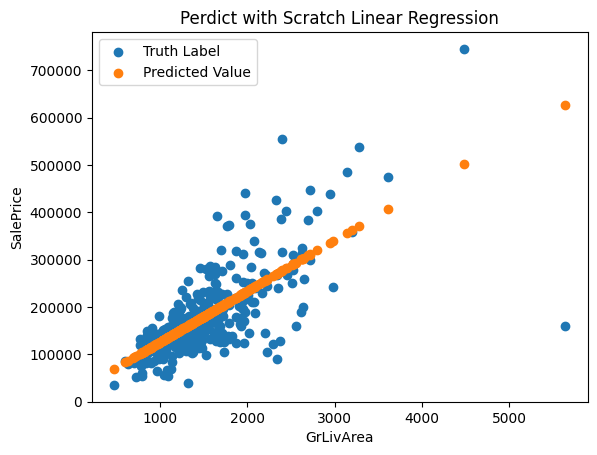

In [ ]:
import matplotlib.pyplot as plt
plt.title('Perdict with Scratch Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth Label')
plt.scatter(X_test, y_pred_house, label='Predicted Value')
plt.legend()
plt.show()

**Comparison with Scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
pd.DataFrame([lr_pred, y_test], index=['Predicted Value', 'Truth Value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predicted Value,166838.847774,202917.958217,149015.335129,124494.502583,180881.615312,290955.308551,187470.913925,158629.229828,257684.751615,114124.458862,...,165974.677464,112072.054376,196220.638314,124170.438716,230247.344272,125466.694181,143614.270692,231003.493293,203025.979506,124494.502583
Truth Value,165000.000000,135900.000000,173000.000000,138000.000000,168500.000000,290000.000000,133000.000000,153000.000000,244000.000000,81000.000000,...,105000.000000,105000.000000,230000.000000,89500.000000,190000.000000,134500.000000,173000.000000,440000.000000,140000.000000,123600.000000


In [ ]:
mean_squared_error(y_test, lr_pred)

3723497855.278135

[Problem 7] Plotting the learning curve
---
---

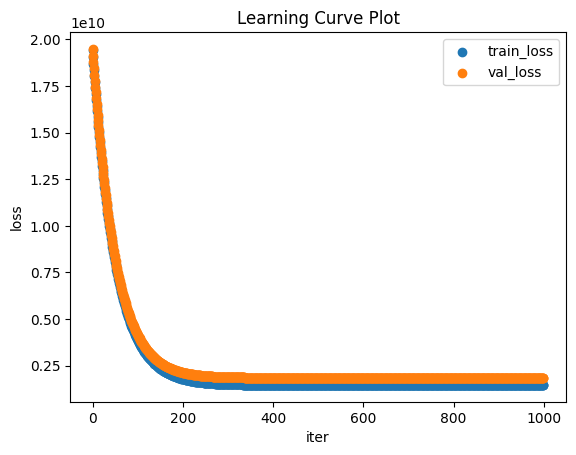

In [ ]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr_house.iter), slr_house.loss, label='train_loss')
plt.scatter(range(slr_house.iter), slr_house.val_loss, label='val_loss')
plt.legend()
plt.show()

[Problem 8] (Advanced Problem) Bias Term Removal
---

In [ ]:
slr_nobias = ScratchLinearRegression(no_bias=True)
slr_nobias.fit(X_train_scaled, y_train)
slr_nobias_pred = slr_nobias.predict(X_test_scaled)

pd.DataFrame([slr_nobias_pred, y_test], index=['Predict Value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predict Value,-14386.137536,21691.415355,-32208.880731,-56728.654702,-343.976231,109724.965076,6245.03792,-22595.401068,76455.844445,-67098.250743,...,-15250.270539,-69150.566626,14994.384579,-57052.704578,49019.621588,-55756.505073,-37609.712002,49775.737966,21799.431981,-56728.654702
Truth value,165000.000000,135900.000000,173000.000000,138000.000000,168500.000000,290000.000000,133000.00000,153000.000000,244000.000000,81000.000000,...,105000.000000,105000.000000,230000.000000,89500.000000,190000.000000,134500.000000,173000.000000,440000.000000,140000.000000,123600.000000


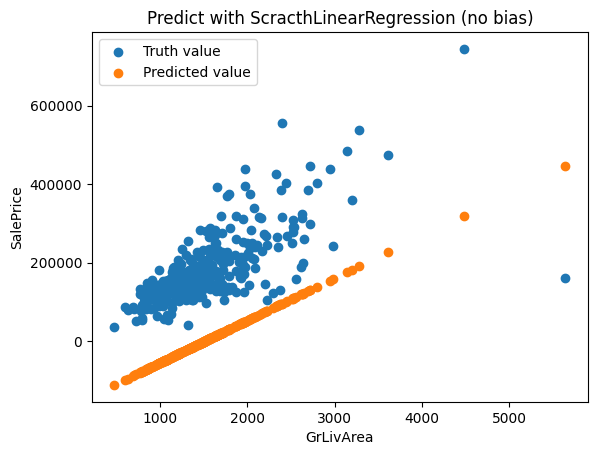

In [ ]:
plt.title('Predict with ScracthLinearRegression (no bias)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr_nobias_pred, label='Predicted value')
plt.legend()
plt.show()

The bias term is used to allow models torepressent patternsthat do not pass through the origin. In this problem, when there is no bias term, the predicted sale price can be negative and most predicted values is smaller than expected values. The bias term now shifts the sale price up on y-axis.

[Problem 9] (Advanced Problem) Multi-dimensional Features
---


In [ ]:
X_9 = df[['GrLivArea', 'YearBuilt']].values
y_9 = df['SalePrice'].values

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9)
print(X_train_9.shape, X_test_9.shape, y_train_9.shape, y_test_9.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_9)

X_train_9scaled = scaler.transform(X_train_9)
X_test_9scaled = scaler.transform(X_test_9)

slr_house_9 = ScratchLinearRegression()
slr_house_9.fit(X_train_9scaled, y_train_9, X_test_9scaled, y_test_9)
y_pred_house_9 = slr_house_9.predict(X_test_9scaled)

pd.DataFrame([y_pred_house_9, y_test_9])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,119698.161343,204464.31061,225342.044192,202339.933207,196271.765952,111863.028674,224587.864313,187224.692523,258923.518668,59790.639449,...,229938.163722,223178.310888,201708.489964,215567.806307,221087.911053,160064.169611,196761.169936,124969.707698,120009.255285,238288.173238
1,132500.000000,201800.00000,154000.000000,202665.000000,174000.000000,87500.000000,270000.000000,173000.000000,266000.000000,130000.000000,...,266500.000000,193000.000000,181134.000000,191000.000000,241000.000000,161500.000000,157000.000000,125000.000000,147000.000000,226000.000000


In [ ]:
MSE(y_pred_house_9, y_test_9)

np.float64(1413765053.5028431)

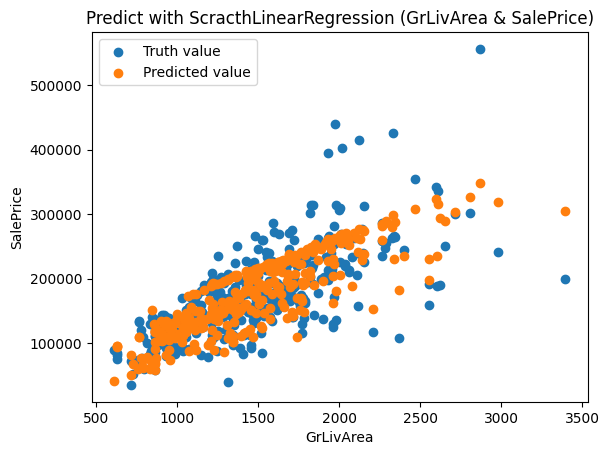

---------------------------------------------------------


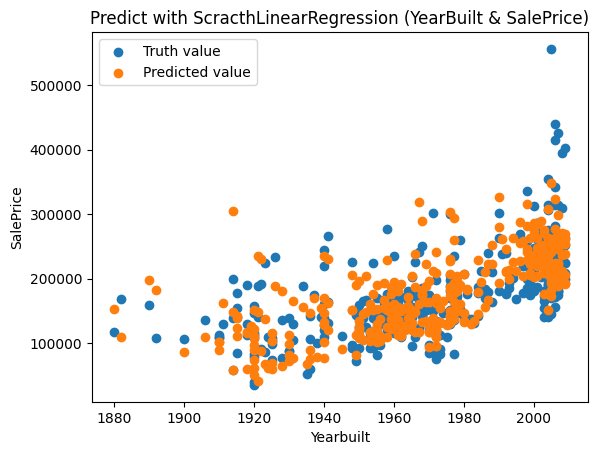

In [ ]:
plt.title('Predict with ScracthLinearRegression (GrLivArea & SalePrice)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test_9[:, 0], y_test_9, label='Truth value')
plt.scatter(X_test_9[:, 0], y_pred_house_9, label='Predicted value')
plt.legend()
plt.show()

print("---------------------------------------------------------")

plt.title('Predict with ScracthLinearRegression (YearBuilt & SalePrice)')
plt.xlabel('Yearbuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test_9[:, 1], y_test_9, label='Truth value')
plt.scatter(X_test_9[:, 1], y_pred_house_9, label='Predicted value')
plt.legend()
plt.show()

[Problem 10] (Advanced Problem) Derivation of Update Formula
---

**Derivación paso a paso de la fórmula de gradiente para regresión lineal**

We start from the **objective function(loss function)**:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left[ h_\theta(x^{(i)}) - y^{(i)} \right]^2
$$

---

**1 General rule of descent gradient:**

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$

---

**2 Partial derivative:**

$$
\frac{\partial J}{\partial \theta_j}
= \frac{\partial}{\partial \theta_j} \left[ \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 \right]
$$

Extract the constant:

$$
= \frac{1}{2m} \sum_{i=1}^m \frac{\partial}{\partial \theta_j}
\left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

---

**3 We apply the chain rule:**

Si $f(z) = z^2 \Rightarrow f'(z) = 2z$

$$
= \frac{1}{2m} \sum_{i=1}^m 2 \left( h_\theta(x^{(i)}) - y^{(i)} \right)
\cdot \frac{\partial}{\partial \theta_j} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

---

**4 Derivada de la hipótesis:**

Replace the hypothesis to derivate:

$$
h_\theta(x^{(i)}) = \sum_{k=0}^n \theta_k x_k^{(i)}
$$


$$
\frac{\partial}{\partial \theta_j} h_\theta(x^{(i)})
= \frac{\partial}{\partial \theta_j} \left( \sum_{k=0}^n \theta_k x_k^{(i)} \right)
= x_j^{(i)}
$$

Since $y^{(i)}$ does not depend on $\theta_j$:

$$
\frac{\partial}{\partial \theta_j} \left( h_\theta(x^{(i)}) - y^{(i)} \right) = x_j^{(i)}
$$

---

**5 Replacing:**

$$
\frac{\partial J}{\partial \theta_j}
= \frac{1}{2m} \sum_{i=1}^m 2 \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

Canceled the $2$:

$$
\frac{\partial J}{\partial \theta_j}
= \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

---

**6 The Gradient Descent update formula:**

$$
\boxed{
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m
\left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
}
$$


[Problem 11] (Advanced Problem) Local Optimum Problem
---

**Una sola θ**   
Sea la hipótesis $h_\theta(x)=\theta x$ y el costo

$$\
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(\theta x^{(i)}-y^{(i)})^2
= a\,\theta^2 + b\,\theta + c,  
\$$

donde
$$\
a=\frac{1}{2m}\sum_{i=1}^m (x^{(i)})^2 \ge 0,\quad
b=-\frac{1}{m}\sum_{i=1}^m x^{(i)}y^{(i)},\quad
c=\frac{1}{2m}\sum_{i=1}^m (y^{(i)})^2.
\$$

1) **Pendiente (1ª derivada)**:
$$\
\frac{dJ}{d\theta}=2a\,\theta+b.
\$$
Punto crítico (pendiente cero):

$$\
\theta^\*=-\frac{b}{2a}\quad\text{(único si }a>0\text{)}.
\$$

2) **Curvatura (2ª derivada)**:
$$
\
\frac{d^2J}{d\theta^2}=2a\ge 0.
\$$

Si $\sum_i (x^{(i)})^2>0$ entonces $a>0$ y $J$ es **estrictamente convexa**: el único punto crítico es **mínimo global**.  
Si $a=0$ (todos los $x^{(i)}=0$), $J$ es constante en $\theta$ (valle plano, ningún máximo local).

**Conclusión:** la gráfica es una parábola (o línea plana) ⇒ **sin óptimos locales falsos**.



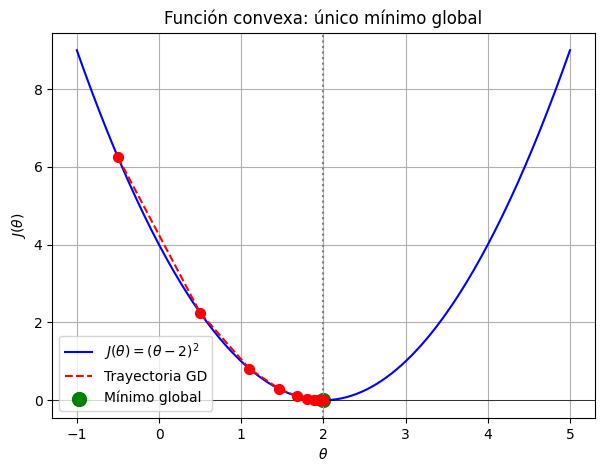

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función convexa
def J(theta):
    return (theta - 2)**2

def dJ(theta):
    return 2*(theta - 2)

# Valores de theta para la curva
theta_vals = np.linspace(-1, 5, 200)
J_vals = J(theta_vals)

# Punto inicial (puedes cambiarlo)
theta0 = -0.5
alpha = 0.2
iterations = 15

# Trayectoria con gradiente descendente
thetas = [theta0]
for i in range(iterations):
    theta0 = theta0 - alpha * dJ(theta0)
    thetas.append(theta0)

# Graficar función
plt.figure(figsize=(7,5))
plt.plot(theta_vals, J_vals, color="blue", label=r"$J(\theta) = (\theta-2)^2$")

# Graficar trayectoria
J_path = J(np.array(thetas))
plt.scatter(thetas, J_path, color="red", s=50, zorder=5)
plt.plot(thetas, J_path, "--", color="red", label="Trayectoria GD")

# Graficar mínimo global
plt.scatter(2, J(2), color="green", s=100, label="Mínimo global")

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(2, color="gray", linestyle=":")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J(\theta)$")
plt.title("Función convexa: único mínimo global")
plt.legend()
plt.grid(True)
plt.show()

The function linear regression has no local optima (objective function) is because it is a convex function.
For the multiple linear regression the objetive function is a convex quadratic function of paarmeter theta.
So a complex funcion has only minimum which is the global minimum and since the gradient descent follows the downward slope it will always reach the unique minimum regardlessof the starting point.